# A simple ANN for image recognition
This notebook shows how to create a simple neural network to identify hand-written characters

We will be using Keras and Tensorflow to build this neural network

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Download and Analyze Data
We will be using MNIST dataset which has images of numbers from 0 to 9

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"""
{X_train.shape}
{X_test.shape}
{y_train.shape}
{y_test.shape}
""")


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)



Let us see the data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Let us see how the handwritten characters look like

4


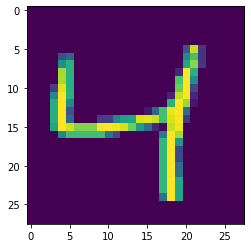

In [6]:
idx = 2

print(y_train[idx])
plt.imshow(X_train[idx])

## Min-Max Normalization
Since each pixel has a value between 0 and 255, we divide by 255 to normalize the data

In [7]:
X_train = X_train/255
X_test = X_test/255

## Define Model Structure

In [8]:
image_dim = X_train[0].shape
image_dim

(28, 28)

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=image_dim),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [13]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.0794 - accuracy: 0.9741
Epoch 2/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.0713 - accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.0674 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.0584 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.0576 - accuracy: 0.9816


## Check performance on Test Data
### Performance on entire test data

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 633us/step - loss: 0.0752 - accuracy: 0.9782


[0.07517534494400024, 0.9782000184059143]

### Prediction for individual test samples
Define the index for which we will be checking prediction

In [15]:
idx = 1

2


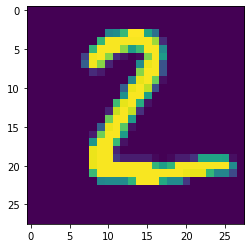

In [16]:
print(y_test[idx])
plt.imshow(X_test[idx])

Get predictions for all values in test data

In [17]:
y_test_predict = model.predict(X_test)
y_test_predict[idx]

array([1.2939145e-12, 7.2648527e-07, 9.9999928e-01, 1.2421890e-10,
       2.8930869e-22, 2.8100147e-10, 4.7961790e-10, 6.7533527e-19,
       9.2688535e-10, 8.0140365e-16], dtype=float32)

Print in decimal format to easily identify the max value

In [18]:
[f'{i:4f}' for i in y_test_predict[idx]]

['0.000000',
 '0.000001',
 '0.999999',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000']

Using `np.argmax()` to find the label with max score

In [19]:
np.argmax(y_test_predict[1])

2

Get class labels for all test data prediction

In [20]:
y_test_predicted_labels = [np.argmax(i) for i in y_test_predict]
y_test_predicted_labels[:5]

[7, 2, 1, 0, 4]

### Confusion Matrix

In [23]:
conf_mat = tf.math.confusion_matrix(y_test, y_test_predicted_labels)

print('X-axis: Predicted label\nY-axis: True label')
pd.DataFrame(conf_mat.numpy())

X-axis: Predicted label
Y-axis: True label


,0,1,2,3,4,5,6,7,8,9
0,972,0,0,2,0,1,3,1,1,0
1,0,1126,2,1,0,0,1,0,5,0
2,3,1,1015,2,1,0,1,3,6,0
3,0,0,7,986,0,6,0,3,4,4
4,0,0,2,1,955,0,7,1,1,15
5,2,0,0,8,1,872,3,2,3,1
6,6,2,1,2,1,5,939,0,2,0
7,2,3,10,5,0,0,0,1003,1,4
8,8,0,2,11,4,6,2,4,936,1
9,3,5,0,8,3,4,1,4,3,978


### Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Visualize using Tensorboard
Add callback for tensorboard

In [26]:
logdir="logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True, histogram_freq=1)

2021-09-12 10:21:29.088671: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-09-12 10:21:29.088684: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-09-12 10:21:29.088948: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=image_dim),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
 196/1875 [==>...........................] - ETA: 1s - loss: 0.7956 - accuracy: 0.7672

2021-09-12 10:21:46.284176: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-09-12 10:21:46.284194: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-09-12 10:21:46.286358: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-09-12 10:21:46.287749: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-09-12 10:21:46.290532: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20210912-102129/train/plugins/profile/2021_09_12_10_21_46

2021-09-12 10:21:46.291352: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/20210912-102129/train/plugins/profile/2021_09_12_10_21_46/Harsh-Kumar.trace.json.gz
2021-09-12 10:21:46.294292: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/20210912-102129/train/plugins/profile/202

1875/1875 [==============================] - 2s 953us/step - loss: 0.3185 - accuracy: 0.9064
Epoch 2/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.1555 - accuracy: 0.9546
Epoch 3/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.1191 - accuracy: 0.9640
Epoch 4/5
1875/1875 [==============================] - 2s 999us/step - loss: 0.0996 - accuracy: 0.96990s - loss: 0.0984 - accu
Epoch 5/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.0847 - accuracy: 0.9740


In [28]:
%load_ext tensorboard
%tensorboard --logdir logs